The source for this exercise lecture is in a *Python 2* kernel *Jupyter* notebook.
For more information, see [python.org](https://www.python.org/) and [jupyter.org](http://jupyter.org/).

See [ricopic.one/measurement/notebooks](http://ricopic.one/measurement/notebooks) for the source code notebook.

This exercise encodes a "secret word" into a sampled waveform for decoding via a *discrete Fourier transform* (DFT).
The nominal goal of the exercise is to decode the secret word.
Along the way, plotting and interpreting the DFT will be important.

First, load relevant packages.

In [1]:
import matplotlib.pyplot as plt # for plotting
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')
import numpy as np # for all things numeric
import scipy.io # for saving data

We define two functions: `letter_to_number` to convert a letter into an `int`eger index of the alphabet (a becomes 1, b becomes 2, etc.) and `string_to_number_list` to convert a string to a `list` of `int`s, as shown in the example at the end.

In [2]:
def letter_to_number(letter):
    return ord(letter) - 96

def string_to_number_list(string):
    out = [] # list
    for i in range(0,len(string)):
        out.append(letter_to_number(string[i]))
    return out # list

print '"aces" = '+str(string_to_number_list('aces'))

"aces" = [1, 3, 5, 19]


Now, we encode a code string `code` into a signal by beginning with "white noise," which is *broadband* (appears throughout the spectrum) and adding to it `sin` functions with amplitudes corresponding to the letter assignments of the code and harmonic corresponding to the position of the letter in the string.
For instance, the string `'bad'` would be represented by noise plus the signal
\begin{align}
    2 \sin{2\pi t} + 1 \sin{4\pi t} + 4 \sin{6\pi t}.
\end{align}

In [16]:
N = 2000
Tm = 30
T = float(Tm)/float(N)
fs = 1/T
x = np.linspace(0, Tm, N)
noise = 4*np.random.normal(0, 1, N)
code = 'abba'
code_number_array = np.array(string_to_number_list(code)) # list into array
y = np.array(noise)
for i in range(0,len(code)):
    y = y + code_number_array[i]*np.array(np.sin(2.*np.pi*(i+1.)*x))

Now, we plot.

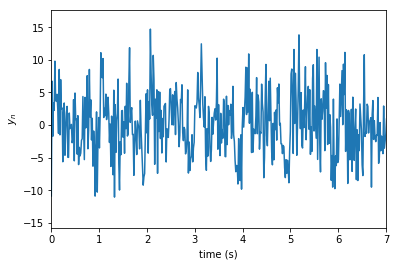

In [17]:
plt.figure()
plt.plot(x,y)
plt.xlim([0,Tm/4])
plt.xlabel('time (s)')
plt.ylabel('$y_n$')
plt.show()

Finally, we can save our data to a file `secrets` to distribute our message.
We save it in two formats:
1. `secrets.npy` the `numpy` format that's not all that compressed and
2. `secrets.mat` the *MATLAB* format that's impressively compressed.

In [18]:
np.save('secrets',y)
scipy.io.savemat('secrets.mat',mdict={'y':y.astype('float')})

In order to load the `.npy` file into *Python*, we can use the following command.
```python
secret_array = np.load('secrets.npy')
```